### **Importing Required Libraries**
#### We start by importing the necessary libraries for our analysis. These libraries provide functions and tools for data manipulation, visualization, and clustering.



In [75]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


# Suppressing future warnings to enhance code readability
import warnings
warnings.simplefilter("ignore")

### **Data Extraction: Obtaining the Dataset**
#### Here, we begin by extracting the dataset from the provided link. The dataset contains information about wines and will be stored in the variable *'data_wine'*.
#### We utilize the ***pandas*** library to read the dataset from the CSV file and display the first few rows to verify the structure.


In [76]:
url = "https://storage.googleapis.com/the_public_bucket/wine-clustering.csv"
data_wine = pd.read_csv(url)
data_wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Let's use the function .info() of pandas to see basic information about the dataset.

In [77]:
data_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


### Observing Dataset Information
#### Upon using the .info() function from pandas, we observe that the dataset comprises 13 attributes. All data types appear to be correct, and there are no null values present. So we start the exploratory data analysis (EDA) to gain more insights


## <center> **Exploratory Data Analysis (EDA)**
#### We first use the .describe() function to generate descriptive statistics for numerical attributes, and then calculate the correlation matrix using the .corr() function

In [78]:
data_wine.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [79]:
maps = data_wine.corr()
maps.style.background_gradient(cmap="coolwarm")

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Ash_Alcanity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


Displaying the correlation matrix provides us with valuable information about the relationships between different attributes. Visualizing the correlation matrix using a heatmap enhances our understanding by highlighting strong and weak correlations. 
As we can see, *`Flavanoids`* and *`Total_Phenols`* exhibit strong correlations with nearly all other variables in the dataset. This could be suggesting the existing linear relationship between these attributes and others. 

Further investigation into these variables is **warranted** to understand their impact on the dataset. 

Additionally, it's worth highlighting the noteworthy correlations:
- Flavanoids and OD280 $(0.78)$
- Total_Phenols and OD280 $(0.699)$
- Alcohol and Proline $(0.64)$

These correlations suggest potential associations that may merit closer examination. Let's visualize these relationships using scatter plots.


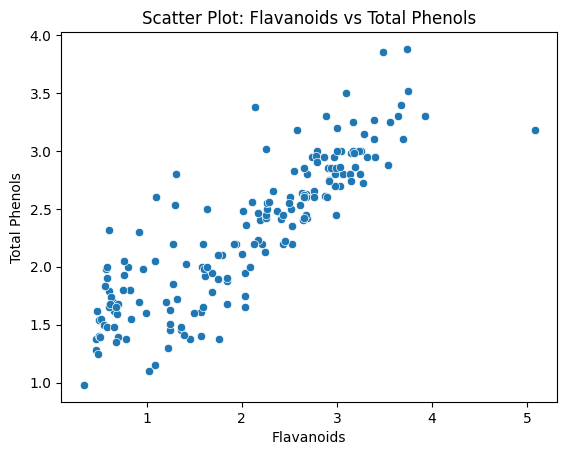

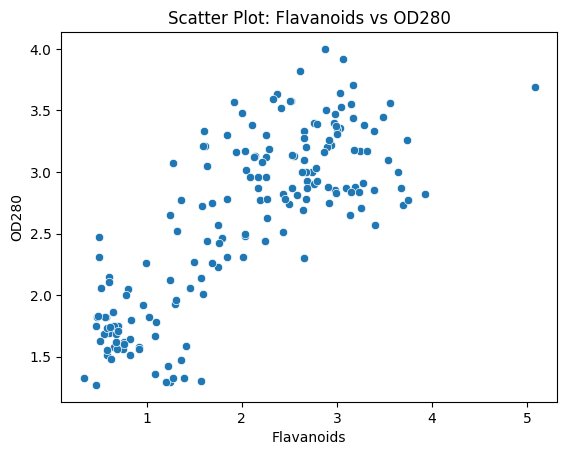

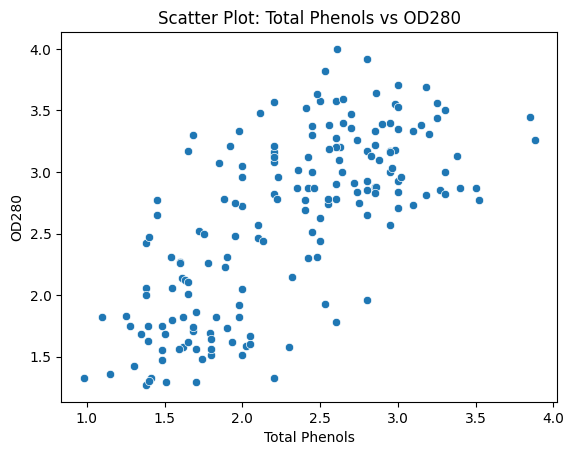

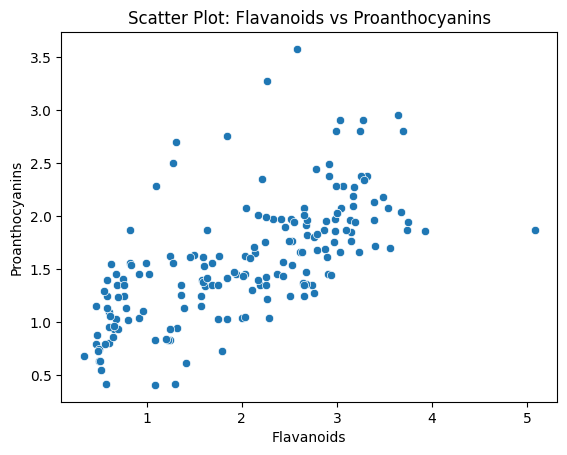

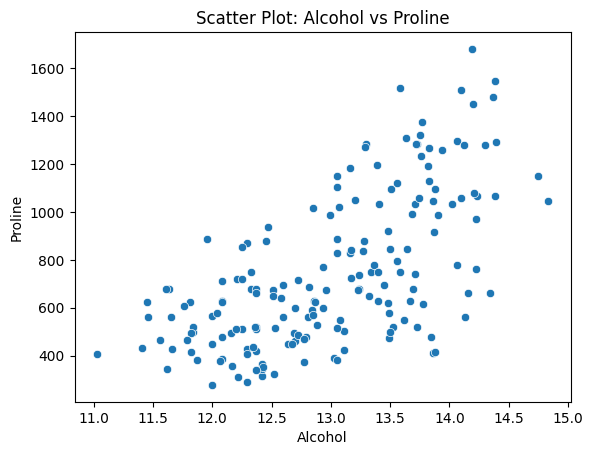

In [80]:
def create_scatterplot(x, y, xlabel, ylabel, title):
    sns.scatterplot(x=x, y=y, data=data_wine)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

# Scatter plots for specified variables
create_scatterplot('Flavanoids', 'Total_Phenols', 'Flavanoids', 'Total Phenols', 'Scatter Plot: Flavanoids vs Total Phenols')
create_scatterplot('Flavanoids', 'OD280', 'Flavanoids', 'OD280', 'Scatter Plot: Flavanoids vs OD280')
create_scatterplot('Total_Phenols', 'OD280', 'Total Phenols', 'OD280', 'Scatter Plot: Total Phenols vs OD280')
create_scatterplot('Flavanoids','Proanthocyanins','Flavanoids', 'Proanthocyanins', 'Scatter Plot: Flavanoids vs Proanthocyanins')
create_scatterplot('Alcohol', 'Proline', 'Alcohol', 'Proline', 'Scatter Plot: Alcohol vs Proline')


## <center> **Unsupervised Learning: Clustering Wine Data**
### Now, we embark on an unsupervised learning to cluster the wine data into distinct groups

####  First, we normalized. Although there are few outliers, the attributes exhibit varying scales. Normalization ensures consistency in scale across all features, enhancing the effectiveness of subsequent analysis

In [82]:
# Performing Min-Max normalization
data_normalized = (data_wine - data_wine.min())/(data_wine.max()-data_wine.min())

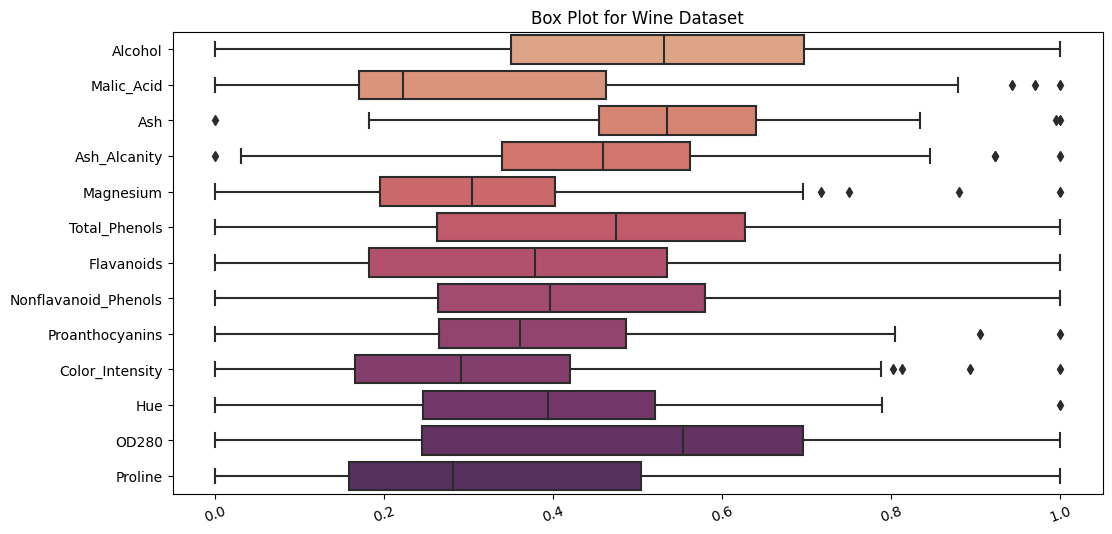

In [85]:
# Create box plot with specified color palette to see outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_normalized, palette="flare",orient="h")

# Rotate x-axis labels by 20 degrees
plt.xticks(rotation=20)
plt.title('Box Plot for Wine Dataset')
plt.show()

####  Determine Optimal Number of Clusters
First, we calculate the Within-Cluster Sum of Squares (WCSS) using the Elbow Method to identify potential cluster counts. Then, we validate our choice using the silhouette score to ensure robustness in our clustering approach.


In [ ]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,max_iter=400)
    kmeans.fit(data_normalized)
    wcss.append(kmeans.inertia_)

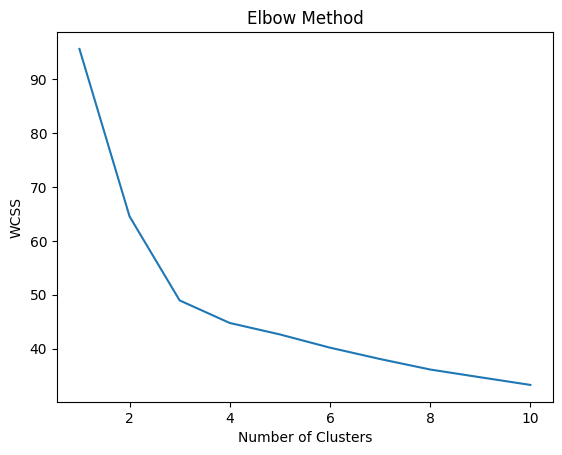

In [ ]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

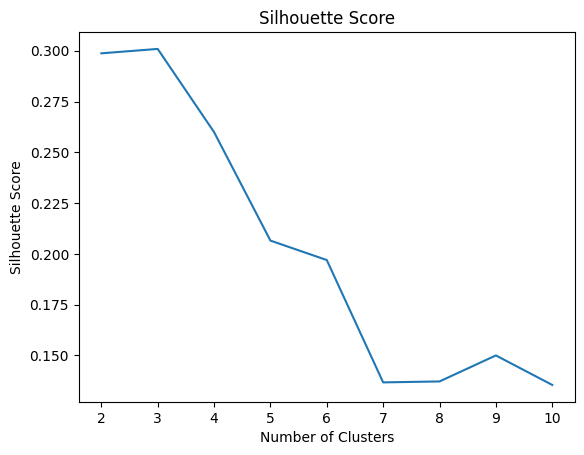

In [ ]:
cluster_range = range(2, 11)
silhouette_scores = []

# Calculate silhouette score for each cluster number
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, max_iter=400)
    cluster_labels = kmeans.fit_predict(data_normalized)
    silhouette_avg = silhouette_score(data_normalized, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting the silhouette scores
plt.plot(cluster_range, silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


##### It appears that three clusters provide a suitable choice for our KMeans algorithm
##### Therefore, we will proceed with clustering using three clusters and a maximum iteration limit of 400

In [ ]:
clustering = KMeans(n_clusters=3,max_iter=300)
clustering.fit(data_normalized)


KMeans(n_clusters=3)

In [ ]:
data_normalized["KMeans_Clusters"]=clustering.labels_
data_normalized.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,KMeans_Clusters
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0


### <center> **Performing Dimensionality Reduction with PCA.** 
#### Here, we apply Principal Component Analysis (PCA) to reduce the dimensionality of the dataset to two components.


In [ ]:
pca = PCA(n_components=2)
pca_wines = pca.fit_transform(data_normalized)
pca_wines_df = pd.DataFrame(data = pca_wines,columns=["Component_1","Component_2"])
pca_name_wines = pd.concat([pca_wines_df,data_normalized[["KMeans_Clusters"]]],axis=1)


The dataset has been transformed into a two-dimensional space using PCA. The resulting DataFrame 'pca_name_wines' includes the two principal components along with the original cluster labels assigned by the KMeans algorithm

Let's visualize the dataset

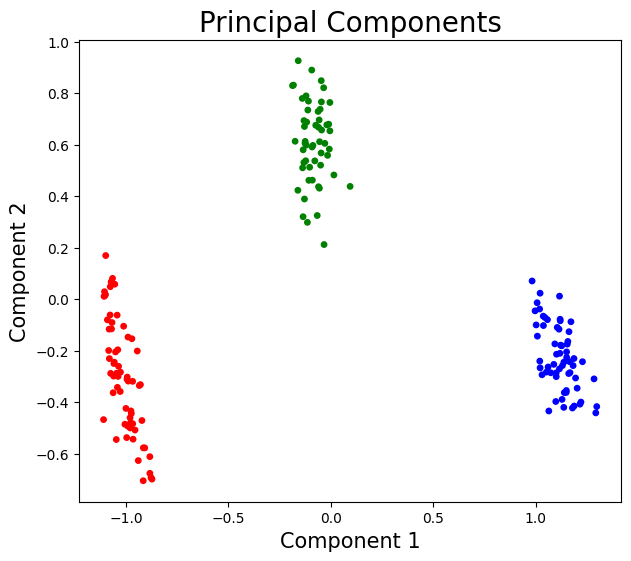

In [ ]:
fig = plt.figure(figsize=(7,6))

ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Component 1",fontsize = 15)
ax.set_ylabel("Component 2",fontsize = 15)
ax.set_title("Principal Components",fontsize = 20)

color_theme = np.array(["blue","green","red"])
ax.scatter(x = pca_name_wines.Component_1,
           y = pca_name_wines.Component_2,
           c=color_theme[pca_name_wines.KMeans_Clusters],
           s = 15)

plt.show() 


## <center> ***Conclusion***
### I conclude that the clustering analysis effectively partitioned the dataset into meaningful clusters, providing valuable insights into the underlying structure of the data. Further analysis and interpretation may be conducted to explore the characteristics and patterns within each cluster